In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader,Dataset
from model_classes.convNet import ConvNet,ConvNet2
from torchvision.models import resnet18
import matplotlib.pyplot as plt

#import torchvision.datasets.ImageFolder 
import matplotlib.pyplot as plt
import numpy as np
import os
from const import *
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size=4
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])

import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        #print(f"image path: {img_path}")
        image = read_image(img_path)
        image=image.to(torch.float32)
        #print(f"image type: {type(image)}")
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            #print('here')
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
train_dataset= torchvision.datasets.ImageFolder(TRAIN_IMAGE_PATH,transform)
test_dataset= torchvision.datasets.ImageFolder(TEST_IMAGE_PATH,transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,shuffle=True)




In [2]:
print(train_dataset[0][0].size())

torch.Size([3, 44, 6])


In [2]:
def train(model,num_epochs=500,learning_rate=0.00001):
    print(f"lr={learning_rate}")
    loss_arr=[]
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
    n_total_steps = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            # origin shape: [4, 3, 32, 32] = 4, 3, 1024
            # input_layer: 3 input channels, 6 output channels, 5 kernel size
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_arr.append(loss)
            if (i+1) % 200 == 0:
                print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
    #plt.scatter(np.linspace(1, num_epochs, num_epochs).astype(int),loss_arr)
    #plt.show()
    print('Finished Training')
    PATH = './cnn.pth'
    torch.save(model.state_dict(), PATH)

In [3]:
#Load model and train
output_size=10
model = ConvNet2(output_size=10)
MODEL_PATH=os.path.join("trained_models","1_1_convNet2_ep=250_lr_0001.pth")
model.load_state_dict(torch.load(MODEL_PATH,map_location=torch.device(device)))
model.eval()
train(model,num_epochs=100,learning_rate=0.0005)

lr=0.0005
Epoch [1/100], Step [200/735], Loss: 0.2542
Epoch [1/100], Step [400/735], Loss: 0.7075
Epoch [1/100], Step [600/735], Loss: 0.5104
Epoch [2/100], Step [200/735], Loss: 0.3252
Epoch [2/100], Step [400/735], Loss: 0.1685
Epoch [2/100], Step [600/735], Loss: 0.3808
Epoch [3/100], Step [200/735], Loss: 0.3510
Epoch [3/100], Step [400/735], Loss: 0.3930
Epoch [3/100], Step [600/735], Loss: 0.3185
Epoch [4/100], Step [200/735], Loss: 0.1755
Epoch [4/100], Step [400/735], Loss: 1.1167
Epoch [4/100], Step [600/735], Loss: 0.6098
Epoch [5/100], Step [200/735], Loss: 0.4252
Epoch [5/100], Step [400/735], Loss: 0.3225
Epoch [5/100], Step [600/735], Loss: 0.1936
Epoch [6/100], Step [200/735], Loss: 0.0818
Epoch [6/100], Step [400/735], Loss: 0.1881
Epoch [6/100], Step [600/735], Loss: 0.2775
Epoch [7/100], Step [200/735], Loss: 0.3085
Epoch [7/100], Step [400/735], Loss: 1.0922
Epoch [7/100], Step [600/735], Loss: 0.7534
Epoch [8/100], Step [200/735], Loss: 0.1160
Epoch [8/100], Step [4

cpu
lr=1e-05
Epoch [1/500], Step [200/379], Loss: 2.2380
Epoch [2/500], Step [200/379], Loss: 2.3844
Epoch [3/500], Step [200/379], Loss: 2.2777
Epoch [4/500], Step [200/379], Loss: 2.2281
Epoch [5/500], Step [200/379], Loss: 2.3245
Epoch [6/500], Step [200/379], Loss: 2.3272
Epoch [7/500], Step [200/379], Loss: 2.3980
Epoch [8/500], Step [200/379], Loss: 2.3534
Epoch [9/500], Step [200/379], Loss: 2.2705
Epoch [10/500], Step [200/379], Loss: 2.2296
Epoch [11/500], Step [200/379], Loss: 2.3219
Epoch [12/500], Step [200/379], Loss: 2.2391
Epoch [13/500], Step [200/379], Loss: 2.3362
Epoch [14/500], Step [200/379], Loss: 2.2863
Epoch [15/500], Step [200/379], Loss: 2.3198
Epoch [16/500], Step [200/379], Loss: 2.2417
Epoch [17/500], Step [200/379], Loss: 2.3686
Epoch [18/500], Step [200/379], Loss: 2.2492
Epoch [19/500], Step [200/379], Loss: 2.2909
Epoch [20/500], Step [200/379], Loss: 2.3781
Epoch [21/500], Step [200/379], Loss: 2.2828
Epoch [22/500], Step [200/379], Loss: 2.3307
Epoch 

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

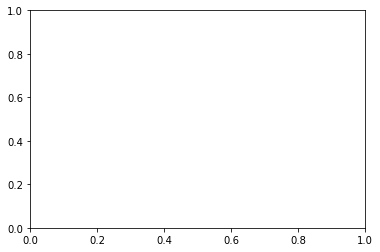